In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load training data

train_data = pd.read_csv('./data/train.csv')

## DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load training data

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

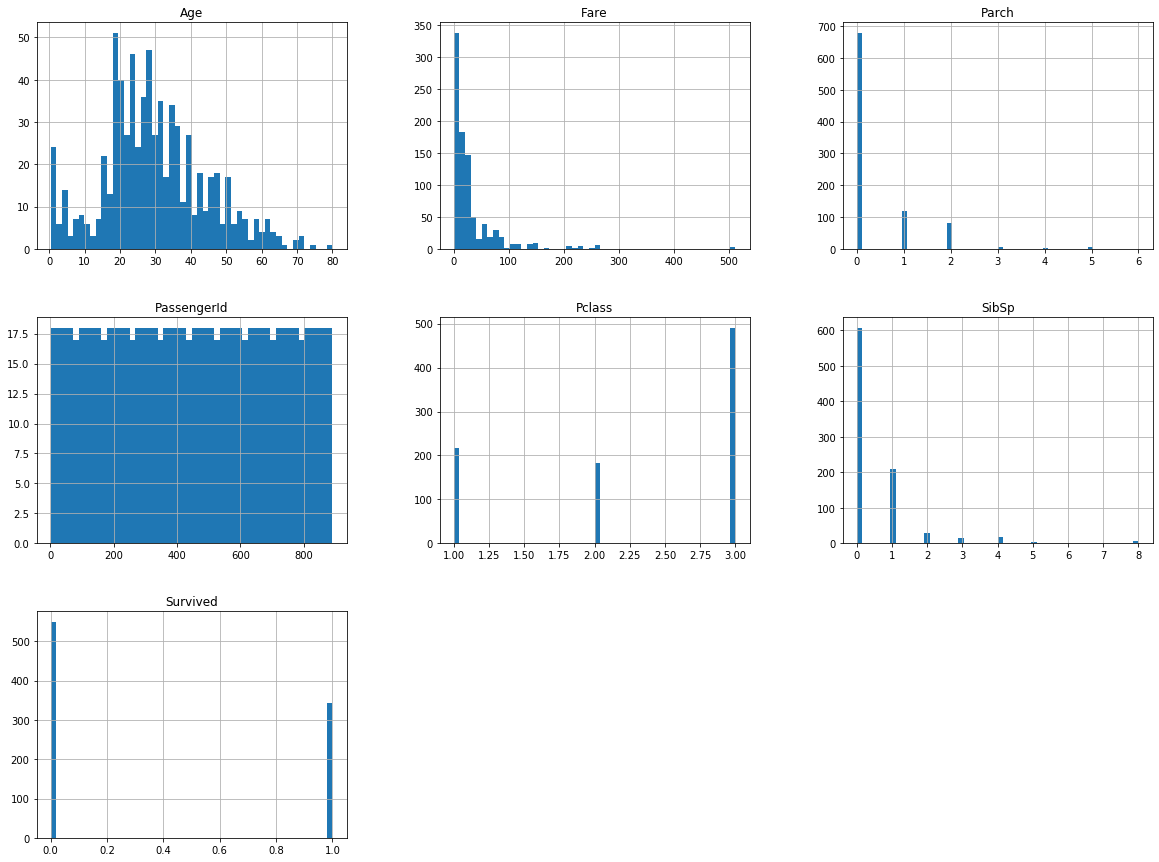

In [3]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
# Display the headers for columns of training datset

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Display first 5 entries of training datset

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display the headers for columns of testing datset

test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Display first 5 entries of testing datset

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#Identify columns in which entries have missing values in training dataset

print(train_data.columns[train_data.isnull().any()].tolist())
print(test_data.columns[test_data.isnull().any()].tolist())

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


In [9]:
#Display variation of Pclass in training dataset

train_data.Pclass.value_counts()



3    491
1    216
2    184
Name: Pclass, dtype: int64

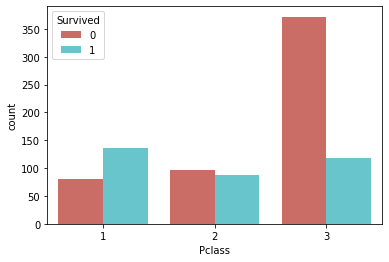

In [10]:
sns.countplot(x='Pclass', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=0)
plt.show()


In [11]:
#Display variation of Sex(Gender) in training dataset

train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

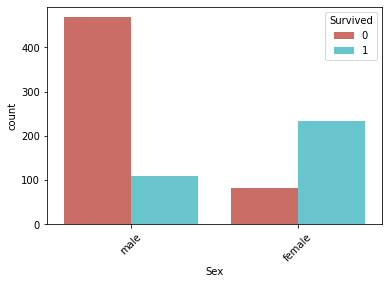

In [12]:
sns.countplot(x='Sex', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [13]:
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset.Sex.map({'male':0, 'female':1}).astype(int)

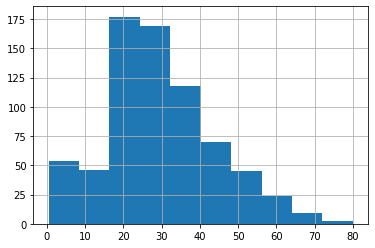

In [14]:
#Display graph of "Age" distribution in training dataset

train_data.Age.hist()

In [15]:
#Identify number of entries with missing values in "Age" for training dataset

train_data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [16]:
#Discretize and fill in missing data in "Age" for training dataset

for dataset in [train_data, test_data]:
    # fill in missing value
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = np.random.randint(age_avg - age_std, 
                                                                     age_avg + age_std, 
                                                                     size=dataset['Age'].isnull().sum())
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [17]:
train_data.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

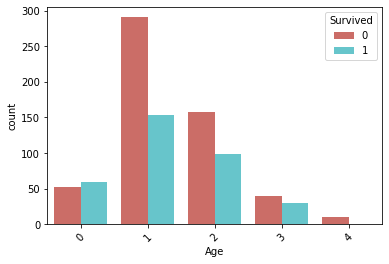

In [18]:
sns.countplot(x='Age', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

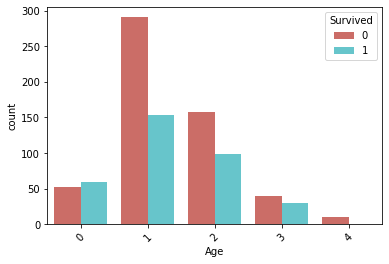

In [19]:
sns.countplot(x='Age', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [20]:
#Display variation of "SibSp" in training dataset

train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
#Display variation of "Parch" in training dataset

train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
#Combine and Discretize "SibSp" and "Parch"

for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

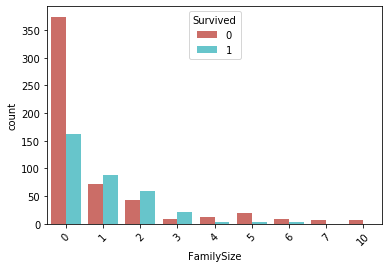

In [23]:
sns.countplot(x='FamilySize', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [24]:
#Display variation of "Cabin" in training dataset

train_data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
A5             1
E17            1
B86            1
B82 B84        1
C47            1
Name: Cabin, Length: 147, dtype: int64

In [25]:
#Binarilize "Cabin"

for dataset in [train_data, test_data]:
    dataset['Has_Cabin'] = dataset['Cabin'].isna().tolist()

In [26]:
train_data.Has_Cabin.value_counts()

True     687
False    204
Name: Has_Cabin, dtype: int64

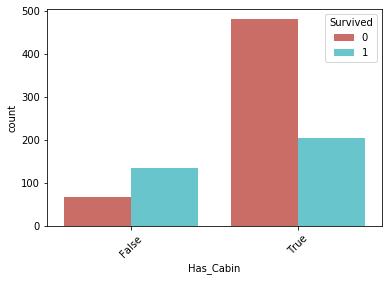

In [27]:
sns.countplot(x='Has_Cabin', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

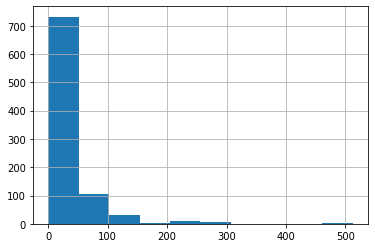

In [28]:
#Display graph of "Fare" distribution in training dataset

train_data.Fare.hist()

In [29]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [30]:
#Discretize and fill in missing data in "Fare" for training dataset

for dataset in [train_data, test_data]:
    dataset.loc[dataset['Fare'] <= 50, 'Fare'] = 0
    dataset.loc[dataset['Fare'] > 50, 'Fare'] = 1
    dataset.loc[np.isnan(dataset['Fare']), 'Fare'] = 0
    dataset['Fare'] = dataset['Fare'].astype(int)

In [31]:
train_data.Fare.value_counts()

0    731
1    160
Name: Fare, dtype: int64

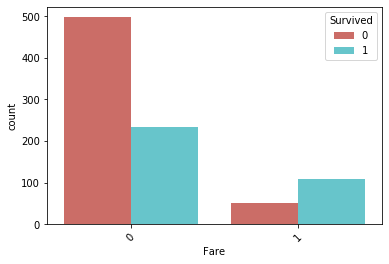

In [32]:
sns.countplot(x='Fare', data=train_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Drop features for PassengerId, Name, Ticket, Cabin, SibSp, Parch, Embarked

drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked']
for dataset in [train_data, test_data]:
    dataset.drop(drop_features, axis=1, inplace=True)

In [34]:
#Display first 5 entries of preprocessed training datset

train_data.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,0,3,0,1,0,1,True
1,1,1,1,2,1,1,False
2,1,3,1,1,0,0,True
3,1,1,1,2,1,1,False
4,0,3,0,2,0,0,True


In [35]:
#Display first 5 entries of preprocessed training datset

test_data.head()

,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,3,0,2,0,0,True
1,3,1,2,0,1,True
2,2,0,3,0,0,True
3,3,0,1,0,0,True
4,3,1,1,0,2,True


In [36]:
#Display key statistics of preprocessed training datset

train_data.describe()

,Survived,Pclass,Sex,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.353535,0.179574,0.904602
std,0.486592,0.836071,0.477990,0.841104,0.384047,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,1.000000,10.000000


In [37]:
#Display key statistics of preprocessed training datset

test_data.describe()

,Pclass,Sex,Age,Fare,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,1.368421,0.191388,0.839713
std,0.841838,0.481622,0.785454,0.393865,1.519072
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,0.000000,1.000000
max,3.000000,1.000000,4.000000,1.000000,10.000000


In [38]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Fare          0.286113
FamilySize    0.016639
Age          -0.051912
Has_Cabin    -0.316912
Pclass       -0.338481
Name: Survived, dtype: float64

## Decision Tree Classifier

In [88]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [89]:
#Split training data into 80/20 Train/Test Split

# Vectorize attribute data from last four columns(Pclass, Sex, Age, Fare, FamilySize) to X(train_features)
X = train_data.drop(['Survived'], axis=1).values

# Assign label data from first columns(Survived) to y(train_labels)
y = train_data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Split training data into 80/20 Train/Test Split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_clf.fit(train_features, train_labels)

In [40]:
train_features = train_data.drop(['Survived'], axis=1).values
train_labels = train_data['Survived']

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

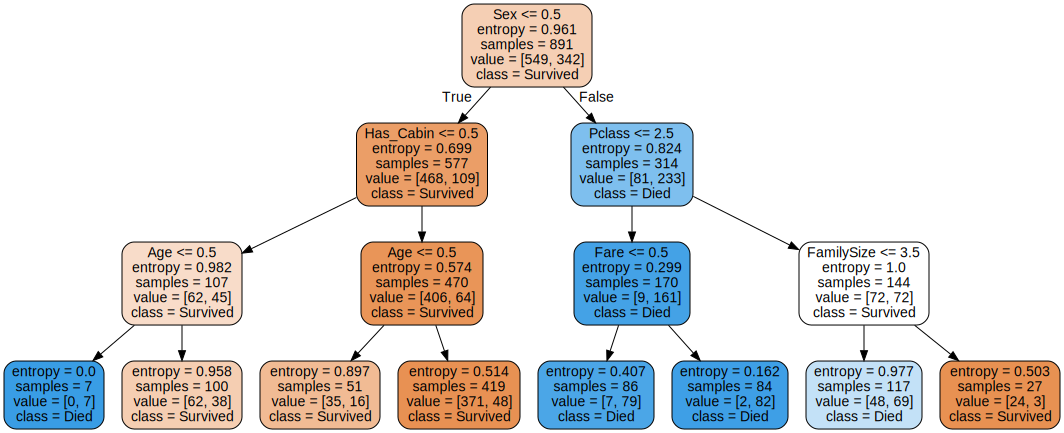

In [41]:
import graphviz

dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=train_data.drop(['Survived'], axis=1).columns.tolist(),
                                class_names=['Survived', 'Died'],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)

graph

In [42]:
test_features = test_data.values
pred_labels = dt_clf.predict(test_features)
submission = pd.read_csv('./data/submission_dt.csv')
submission['Survived'] = pred_labels

In [43]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [44]:
submission.to_csv('submission_dt.csv', index=True)

In [45]:
submission.Survived.value_counts()

0    269
1    149
Name: Survived, dtype: int64

In [166]:
df1 = pd.read_csv('./data/train.csv')
df2 = pd.read_csv('submission_dt.csv')

merged_submission = pd.merge(df1, df2)

In [168]:
merged_submission.descibe()

AttributeError: 'DataFrame' object has no attribute 'descibe'

## Support Vector Machine(SVM)

In [90]:
# Vectorize attribute data from last four columns(Pclass, Sex, Age, Fare, FamilySize) to X(train_features)
X = train_data.drop(['Survived'], axis=1).values

# Assign label data from first columns(Survived) to y(train_labels)
y = train_data['Survived']

#Split training data into 80/20 Train/Test Split and Scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [91]:
#Non-Linear SVM(w/ polynomial features)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC


polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\xlim027\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [92]:
#Assessment 
predictions = polynomial_svm_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[99 12]
 [22 46]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       111
           1       0.79      0.68      0.73        68

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [93]:
#Run model on submission
test_features = test_data.values
pred_labels = polynomial_svm_clf.predict(test_features)
submission = pd.read_csv('./data/submission.csv')
submission['Survived'] = pred_labels

submission.to_csv('submission_PSVM.csv', index=True)

submission.Survived.value_counts()

0    256
1    162
Name: Survived, dtype: int64

In [146]:
# Assign attribute data from last four columns("Pclass, Sex, Age, Fare, FamilySize") to X(train_features)
X = train_data.drop(['Survived'], axis=1).values

# Assign label data from first columns("Survived") to y(train_labels)
y = train_data['Survived']

#Split training data into 80/20 Train/Test Split and Scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Split training data into 80/20 Train/Test Split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
X_train

array([[-0.35123736, -0.73561236,  0.77067177, -0.47484031, -0.56191228,
         0.5578834 ],
       [ 0.83962456, -0.73561236, -0.40936759, -0.47484031, -0.56191228,
         0.5578834 ],
       [-1.54209929,  1.35941164, -1.58940695, -0.47484031,  0.04611438,
        -1.79248926],
       ...,
       [ 0.83962456, -0.73561236,  0.77067177, -0.47484031, -0.56191228,
         0.5578834 ],
       [ 0.83962456, -0.73561236, -0.40936759, -0.47484031, -0.56191228,
         0.5578834 ],
       [-1.54209929,  1.35941164,  0.77067177,  2.10597115, -0.56191228,
        -1.79248926]])

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   0.4s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.4s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.1s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.1s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] .

[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=300.0, gamma=0.03, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.03, kernel=rbf, total=   0.4s
[CV] C=300.0, gamma=0.03, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.03, kernel=rbf, total=   0.5s
[CV] C=300.0, gamma=0.03, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 86.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [154]:
grid_search.best_params_

{'C': 30.0, 'gamma': 0.03, 'kernel': 'rbf'}

In [160]:
# Assign attribute data from last four columns("Pclass, Sex, Age, Fare, FamilySize") to X(train_features)
X = train_data.drop(['Survived'], axis=1).values

# Assign label data from first columns("Survived") to y(train_labels)
y = train_data['Survived']

#Split training data into 80/20 Train/Test Split and Scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.03, C=30))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.03,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [164]:
#Assessment 
from sklearn.pipeline import Pipeline

predictions = rbf_kernel_svm_clf(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

TypeError: 'Pipeline' object is not callable

In [165]:
#Run model on submission
test_features = test_data.values
pred_labels = rbf_kernel_svm_clf.predict(test_features)
submission = pd.read_csv('./data/submission.csv')
submission['Survived'] = pred_labels

submission.to_csv('submission_FIN.csv', index=True)

submission.Survived.value_counts()

0    268
1    150
Name: Survived, dtype: int64